In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Temperature observations

In [2]:
from vega_datasets import data
df = data.sf_temps()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [5]:
df = df.set_index('date')

### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


Text(0.5, 0, 'Day with Label for Month')

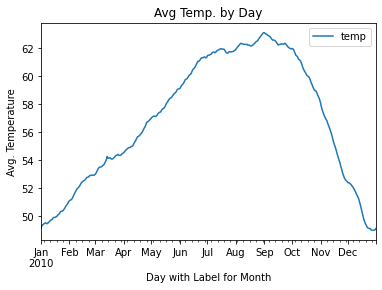

In [7]:
df.resample('D').mean().plot()
plt.title('Avg Temp. by Day')
plt.ylabel('Avg. Temperature')
plt.xlabel('Day with Label for Month')

### Write the code necessary to visualize the minimum temperature over time.

In [8]:
df.resample('D').min()

,temp
date,
2010-01-01,45.80
2010-01-02,46.00
2010-01-03,46.10
2010-01-04,46.10
2010-01-05,46.10
...,...
2010-12-27,45.60
2010-12-28,45.60
2010-12-29,45.60


Text(0.5, 0, 'Day with Label for Month')

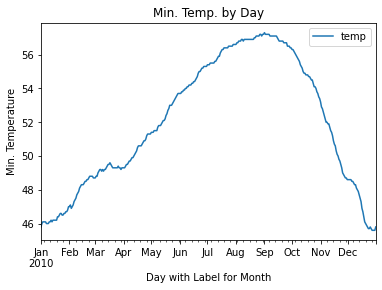

In [9]:
df.resample('D').min().plot()
plt.title('Min. Temp. by Day')
plt.ylabel('Min. Temperature')
plt.xlabel('Day with Label for Month')

### Write the code necessary to visualize the maximum temperature over time.


Text(0.5, 0, 'Day with Label for Month')

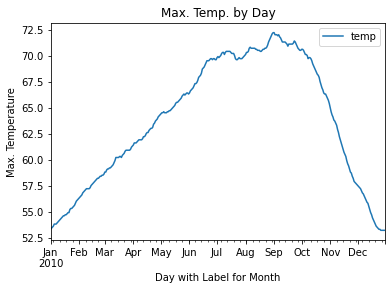

In [10]:
df.resample('D').max().plot()
plt.title('Max. Temp. by Day')
plt.ylabel('Max. Temperature')
plt.xlabel('Day with Label for Month')

### Which month is the coldest, on average?

In [11]:
df.resample('M').mean().index.max()

Timestamp('2010-12-31 00:00:00', freq='M')

In [12]:

df.resample('M').mean().idxmin()[0]

Timestamp('2010-01-31 00:00:00')

In [16]:
print('The coldest month is:\n', 
      df.resample('M').mean().idxmin()[0], 
      'with an average of', 
      df.resample('M').mean().min().round(2)[0])

The coldest month is:
 2010-01-31 00:00:00 with an average of 49.98


### Which month has the highest average temperature?


In [18]:
print('The warmest month is:\n', 
      df.resample('M').mean().idxmax()[0], 
      'with an average of', 
      df.resample('M').mean().max().round(2)[0])

The warmest month is:
 2010-09-30 00:00:00 with an average of 62.49


### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [19]:
df_min_max = df.resample('D').agg(['min','max'])

In [20]:

df_min_max.head()

temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80

In [22]:
df_min_max['change'] = df_min_max[('temp', 'max')] - df_min_max[('temp', 'min')]

In [23]:
df_min_max.head()

temp       change
             min   max       
date                         
2010-01-01 45.80 53.30   7.50
2010-01-02 46.00 53.40   7.40
2010-01-03 46.10 53.50   7.40
2010-01-04 46.10 53.60   7.50
2010-01-05 46.10 53.80   7.70

In [24]:
df_min_max.change.resample('M').mean()


date
2010-01-31    8.34
2010-02-28    9.49
2010-03-31   10.85
2010-04-30   12.32
2010-05-31   12.91
2010-06-30   13.95
2010-07-31   13.98
2010-08-31   13.87
2010-09-30   14.40
2010-10-31   13.43
2010-11-30   10.24
2010-12-31    7.93
Freq: M, Name: change, dtype: float64

In [27]:
print('The month with the highest average change in temp is\n',
      df_min_max.change.resample('M').mean().idxmax(),
      'with an average temperature delta of',
      df_min_max.change.resample('M').mean().round(2).max())

The month with the highest average change in temp is
 2010-09-30 00:00:00 with an average temperature delta of 14.4


### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


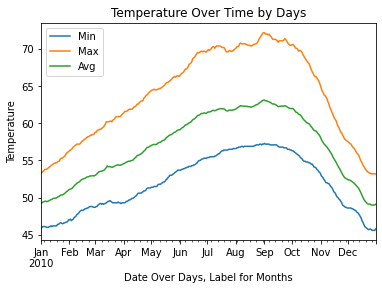

In [28]:
df.resample('D').agg(['min','max','mean']).plot()
plt.title('Temperature Over Time by Days')
plt.xlabel('Date Over Days, Label for Months')
plt.ylabel('Temperature')
plt.legend(('Min','Max','Avg'))

## Seattle weather observations

In [30]:
from vega_datasets import data
df1 = data.seattle_weather()

In [31]:
df1.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [33]:
df1 = df1.set_index('date')

### Which year and month combination has the highest amount of precipitation?

In [35]:
print('The year and month combination with the highest sum of precipitation is:\n')
print(df1.precipitation.resample('M').sum().idxmax())
print('\nwith the max sum of',df1.precipitation.resample('M').sum().round(2).max())

The year and month combination with the highest sum of precipitation is:

2015-12-31 00:00:00

with the max sum of 284.5


### Visualize the amount of monthly precipitation over time.

Text(0, 0.5, 'Precipitation')

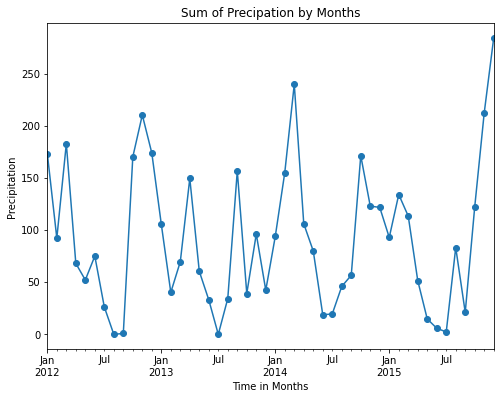

In [39]:
df1.precipitation.resample('M').sum().plot(marker='o')
plt.title('Sum of Precipation by Months')
plt.xlabel('Time in Months')
plt.ylabel('Precipitation')

### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Text(0, 0.5, 'Winds')

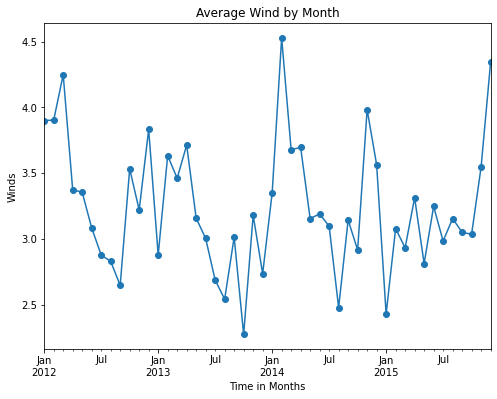

In [41]:
df1.wind.resample('M').mean().plot(marker='o')
plt.title('Average Wind by Month')
plt.xlabel('Time in Months')
plt.ylabel('Winds')

### Which year-month combination is the windiest?

Text(0, 0.5, 'Winds')

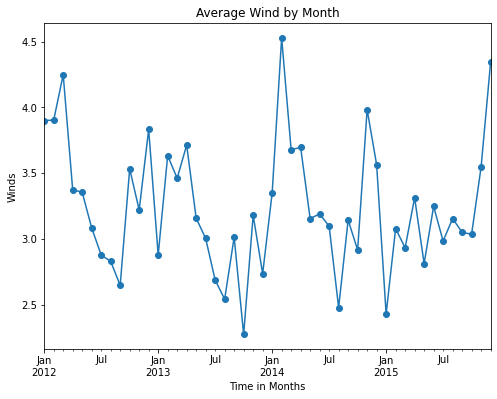

In [42]:
df1.wind.resample('M').mean().plot(marker='o')
plt.title('Average Wind by Month')
plt.xlabel('Time in Months')
plt.ylabel('Winds')

In [43]:
print('The year and month combination with the highest average wind is:\n')
print(df1.wind.resample('M').mean().idxmax())
print('\nwith an average wind of',df1.wind.resample('M').mean().round(2).max())

The year and month combination with the highest average wind is:

2014-02-28 00:00:00

with an average wind of 4.53


### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [44]:
df1[df1.weather == 'sun'].resample('Y').count().weather

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [45]:
print('The year with the highest count of sunny days is:\n')
print(df1[df1.weather == 'sun'].resample('Y').count().weather.idxmax())
print('\nwith a sunny day count of',df1[df1.weather == 'sun'].resample('Y').count().weather.max())

The year with the highest count of sunny days is:

2014-12-31 00:00:00

with a sunny day count of 211


### In which month does it rain the most?

In [46]:
print('The month combination with the highest average precipitation is:\n')
print(df1.precipitation.resample('M').mean().idxmax())
print('\nwith an average rainfall of',df1.precipitation.resample('M').mean().round(2).max())

The month combination with the highest average precipitation is:

2015-12-31 00:00:00

with an average rainfall of 9.18


### Which month has the most number of days with a non-zero amount of precipitation?

In [47]:
print('The month with the most non-zero precipitation grade is:\n')
print(df1[df1.precipitation > 0].weather.resample('M').count().idxmax())
print('\nwith a count of',df1[df1.precipitation > 0].weather.resample('M').count().max())

The month with the most non-zero precipitation grade is:

2012-12-31 00:00:00

with a count of 27


## Flights data

In [67]:
df2 = data.flights_20k()


In [68]:
df2.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [69]:
df2['weekday'] = df2.date.dt.day_name()

In [70]:
df2 = df2.set_index('date')

In [71]:
df2.head()

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday
2001-01-31 16:40:00,-5,1093,FLL,ISP,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday
2001-01-10 21:00:00,-15,550,MSY,MCO,Wednesday
2001-03-30 21:45:00,-2,229,STL,IND,Friday


### Convert any negative delays to 0.

In [72]:
df2.delay = df2.delay.where((df2.delay > 0), 0)

In [73]:
df2.head()

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,Friday


### Which hour of the day has the highest average delay?


In [74]:
print('The hour of day with the highest average delay is:\n')
print(df2.delay.resample('H').mean().idxmax())
print('\nat ',df2.delay.resample('H').mean().max())

The hour of day with the highest average delay is:

2001-02-23 03:00:00

at  360.0


### Does the day of the week make a difference in the delay amount?

In [75]:
df2.head()

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,Friday


Text(0, 0.5, 'average delay')

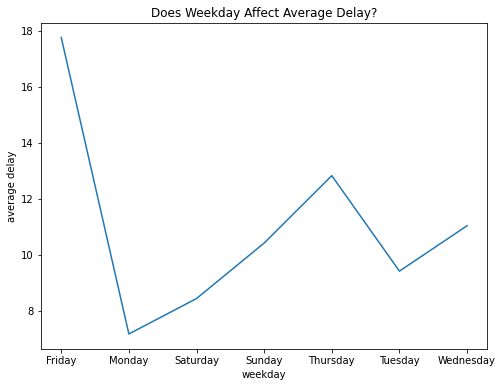

In [78]:
df2.groupby('weekday').mean().delay.plot()
plt.title('Does Weekday Affect Average Delay?')
plt.ylabel('average delay')

### Does the month make a difference in the delay amount?

Text(0, 0.5, 'average delay')

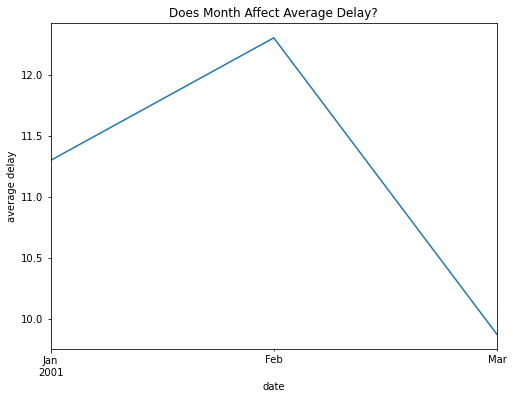

In [80]:
df2.resample('M').mean().delay.plot()
plt.title('Does Month Affect Average Delay?')
plt.ylabel('average delay')